In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('glass.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


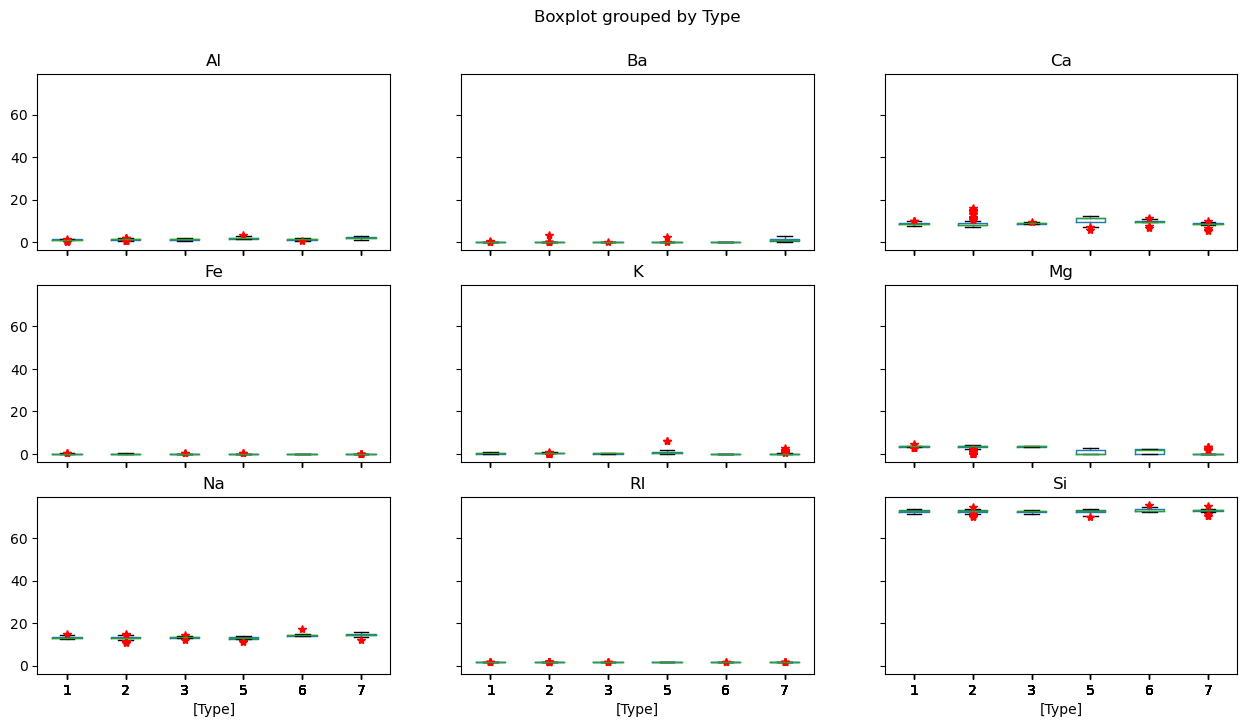

In [94]:
df.boxplot(by='Type', figsize=(15, 8),sym='r*', grid=False)
plt.show()

In [95]:
X = df.drop(columns='Type')
y = df['Type']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [96]:
from sklearn.decomposition import PCA

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)

(214, 9)
(214, 2)


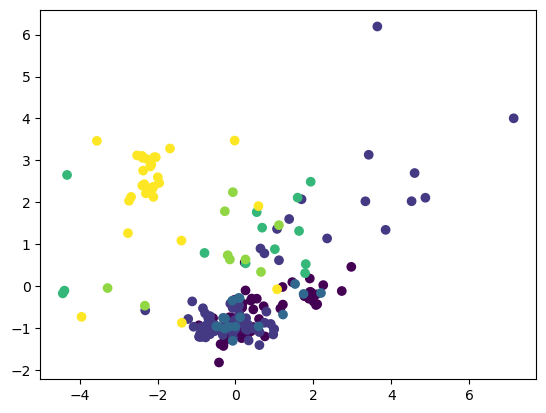

In [97]:
plt.scatter(projected[:, 0], projected[:, 1], c = y)
plt.show()

In [98]:
X = pca.fit_transform(X)
 

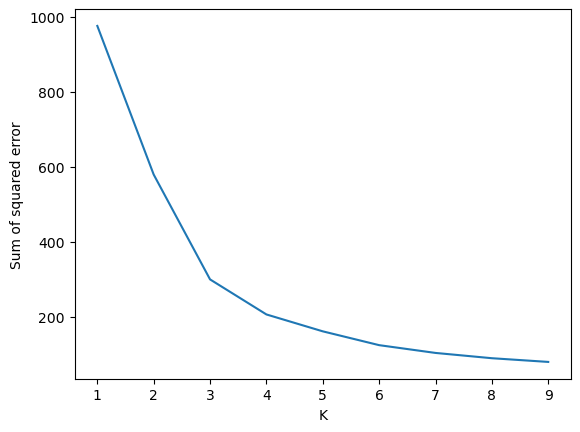

In [99]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
    plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

For 2 clusters: average silhouette_score is 0.5897670252482536
For 3 clusters: average silhouette_score is 0.5926528968341005
For 4 clusters: average silhouette_score is 0.5709223697182366
For 5 clusters: average silhouette_score is 0.5815155665683093
For 6 clusters: average silhouette_score is 0.5954650628061069
For 7 clusters: average silhouette_score is 0.45112682132349585
For 8 clusters: average silhouette_score is 0.4325431705960521


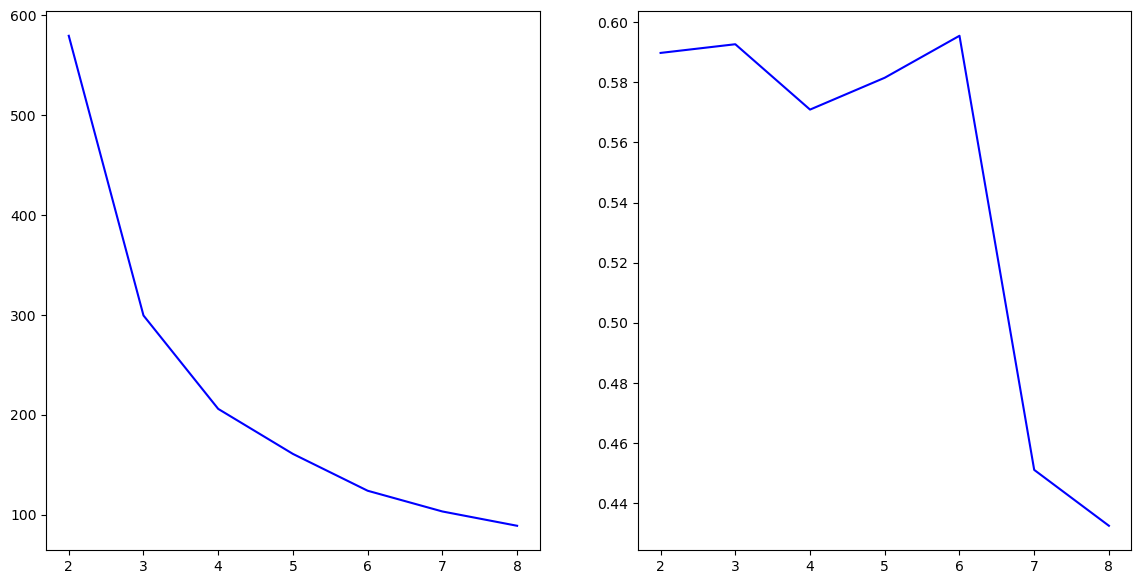

In [100]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,9)
elbow = []
ss = []
for n_clusters in range_n_clusters:
   #iterating through cluster sizes
   clusterer = KMeans(n_clusters = n_clusters, random_state=42, n_init = 10)
   cluster_labels = clusterer.fit_predict(X)
   #Finding the average silhouette score
   silhouette_avg = silhouette_score(X, cluster_labels)
   ss.append(silhouette_avg)
   print(f"For {n_clusters} clusters: average silhouette_score is {silhouette_avg}")
   #Finding the average SSE"
   elbow.append(clusterer.inertia_) # Inertia: Sum of distances of samples to their closest cluster center

fig = plt.figure(figsize=(14,7))

fig.add_subplot(121) 
plt.plot(range_n_clusters, elbow,'b-',label='Sum of squared error')
 

fig.add_subplot(122) 
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
 
plt.show()

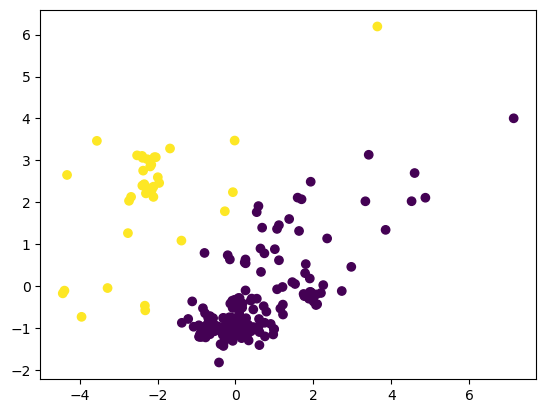

In [101]:
clusterer = KMeans(n_clusters = 2, random_state=42, n_init = 10)
cluster_labels = clusterer.fit_predict(X)
    
plt.scatter(X[:, 0], X[:, 1], c = cluster_labels)
plt.show()

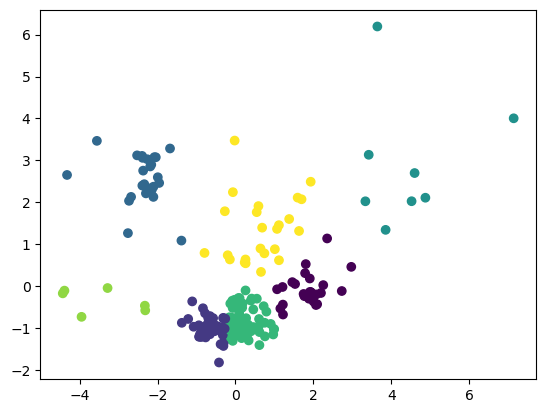

In [102]:
clusterer = KMeans(n_clusters = 7, random_state=42, n_init = 10)
cluster_labels = clusterer.fit_predict(X)
    
plt.scatter(X[:, 0], X[:, 1], c = cluster_labels)
plt.show()

In [103]:
from sklearn.cluster import AgglomerativeClustering

k_rng = range(2,10)
for k in k_rng:
    ac = AgglomerativeClustering(n_clusters = k)
    predict = ac.fit_predict(X)
    silhouette_avg = silhouette_score(X, predict)
    print(f"For {k} clusters: average silhouette_score is {silhouette_avg}")

For 2 clusters: average silhouette_score is 0.5849167539087359
For 3 clusters: average silhouette_score is 0.5597647080884208
For 4 clusters: average silhouette_score is 0.5644471348118266
For 5 clusters: average silhouette_score is 0.5787541965871917
For 6 clusters: average silhouette_score is 0.5940667606392771
For 7 clusters: average silhouette_score is 0.4487837093234719
For 8 clusters: average silhouette_score is 0.4498945689706402
For 9 clusters: average silhouette_score is 0.4529813592779026


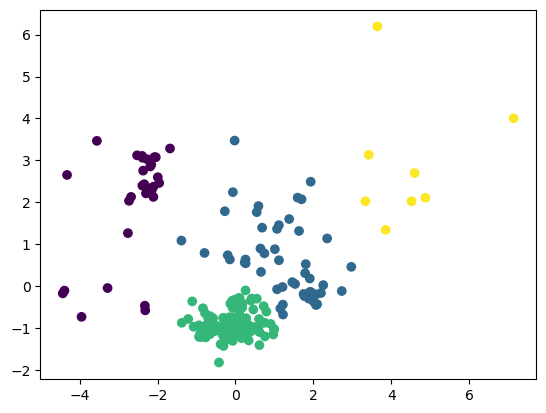

In [104]:
ac = AgglomerativeClustering(n_clusters = 4)
predict = ac.fit_predict(X)
    
plt.scatter(X[:, 0], X[:, 1], c = predict)
plt.show()

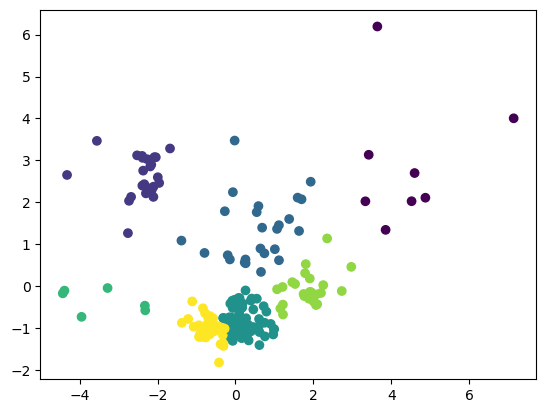

In [105]:
ac = AgglomerativeClustering(n_clusters = 7)
predict = ac.fit_predict(X)
    
plt.scatter(X[:, 0], X[:, 1], c = predict)
plt.show()

In [106]:
from sklearn.cluster import DBSCAN 

k_rng = range(1,8)
for n in k_rng:
    k = 1 + n/10
    ac = DBSCAN(eps = k, min_samples=70)
    predict = ac.fit_predict(X)
    silhouette_avg = silhouette_score(X, predict)
    print(f"For {k} eps: average silhouette_score is {silhouette_avg}")

For 1.1 eps: average silhouette_score is 0.48557122142867754
For 1.2 eps: average silhouette_score is 0.496230105492208
For 1.3 eps: average silhouette_score is 0.5557469792728678
For 1.4 eps: average silhouette_score is 0.5557469792728678
For 1.5 eps: average silhouette_score is 0.5689845520226037
For 1.6 eps: average silhouette_score is 0.5779301065890188
For 1.7 eps: average silhouette_score is 0.5880271356466842


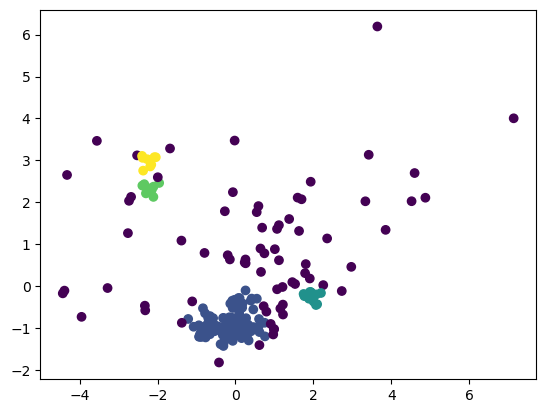

In [107]:
ac = DBSCAN(eps = 0.25)
predict = ac.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c = predict)
plt.show()